In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Load raw data
data source: https://console.treasuredata.com/app/jobs/1143136474/query

In [2]:
df = pd.read_csv(\
'/Volumes/GoogleDrive/My Drive/wish_local/DSF-1437 Evaluate Different Fusion Logistics Carriers/1143136474.csv')

In [3]:
df.head()

,store_id,epc_combined_date,order_channel_post,fm_count,lm_count,gmv,weight,num_mids,sales_fm,purchase_fm,purchase_logistics_fee_lm_previous,purchase_other_fees_lm_previous,logistics_profit_cny_previous,purchase_logistics_fee_lm_1152,purchase_logistics_fee_lm_newtd
0,5f202e4494b324fc795036b0,2020-12-23,2001,69,2,551.140007,18.217051,74,1153.10,101.22,1482.272397,864.782701,-1295.175097,1628.100523,1219.108341
1,5f8e200288b1e12975146eb2,2021-07-16,2001,29,1,151.840001,1.406000,33,352.27,34.05,146.790000,0.000000,171.430000,144.510002,151.698002
2,5d83b30b8c8dc7517df7afff,2021-05-28,1150,31,1,161.270000,1.525000,34,383.52,36.95,115.230000,0.000000,231.340000,154.624998,161.574998
3,5f1fbc143b6482c24274aa6b,2021-06-22,1150,27,5,398.140003,5.673000,27,862.02,48.81,453.840000,0.000000,359.370000,507.205003,403.745002
4,601f0c85d60c5f80241dc92c,2021-02-27,2001,6,1,88.089998,1.222259,7,150.90,11.45,146.671089,0.000000,-7.221089,128.892023,143.447504


In [4]:
df['epc_combined_date'].max()

'2021-07-31'

##### There is only one recombined package weighted > 30 kg, so ignore the potential issue that the recombined package will exceed 30kg

In [5]:
df[df['weight']>=30]

,store_id,epc_combined_date,order_channel_post,fm_count,lm_count,gmv,weight,num_mids,sales_fm,purchase_fm,purchase_logistics_fee_lm_previous,purchase_other_fees_lm_previous,logistics_profit_cny_previous,purchase_logistics_fee_lm_1152,purchase_logistics_fee_lm_newtd
69,5e3c6d5ed5b0df95272b07dd,2021-02-12,1150,98,9,870.950005,30.092362,126,2229.18,148.25,2633.027190,0.000000,-552.097190,2690.812621,1827.312621
87,5f39a00de61337653afd4b4c,2021-02-01,2001,110,4,1188.940001,46.552287,121,2492.43,144.03,3807.083097,361.111461,-1819.794559,4146.601252,2910.898652
616,5d261cf3d7bd63139d92d9ab,2021-01-04,2001,120,3,996.180003,35.865378,126,2161.34,156.77,2894.437157,1912.410989,-2802.278147,3188.557123,2216.249565
933,5dfcca6f29e7866fa022d2bb,2021-02-10,2001,181,6,1447.770003,52.365436,209,3261.93,262.55,4529.237024,719.926467,-2249.783490,4658.158393,3141.926177
1005,5f6fc5b12f4952009909dd6c,2021-02-05,2001,109,4,999.860005,31.030058,114,1993.58,135.86,2676.739506,686.544797,-1505.564303,2777.554899,1927.494784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415284,5ee53444c9719abd7455a9f4,2021-01-19,2001,119,3,903.309999,43.042416,125,2079.23,183.27,3485.703074,1949.257605,-3539.000679,3837.732649,2682.757070
415298,5dbc98d5bc26d40fc0231263,2021-02-09,2001,80,2,715.430007,38.273474,81,1865.61,113.97,3071.054637,621.497488,-1940.912125,3393.245294,2372.775813
415396,5e2878ce21c11f1a00ee77ae,2021-02-10,2001,49,3,629.099998,32.920379,52,1408.74,73.81,2710.920060,2071.397549,-3447.387610,2938.232250,2024.824662
415972,5fa47d4974b18dd60961d63d,2021-02-05,2001,110,3,870.610001,35.139088,129,1942.70,138.89,2861.173980,971.225554,-2028.589534,3126.822447,2169.040694


In [6]:
df = df[df['weight']<=30]

In [7]:
df[(df['weight']<0.05) & (df['order_channel_post']==2001)]

,store_id,epc_combined_date,order_channel_post,fm_count,lm_count,gmv,weight,num_mids,sales_fm,purchase_fm,purchase_logistics_fee_lm_previous,purchase_other_fees_lm_previous,logistics_profit_cny_previous,purchase_logistics_fee_lm_1152,purchase_logistics_fee_lm_newtd
143,6056135bfc631c219546ef59,2021-07-28,2001,1,1,5.400000,0.032,1,10.15,1.05,23.15,0.0,-14.05,20.38,21.88
316,6003201118d554943d213d6f,2021-06-19,2001,1,1,8.000000,0.022,1,10.29,1.00,22.90,0.0,-13.61,22.98,20.98
683,60f4fe319ff301e51ca4ff37,2021-07-28,2001,1,1,3.000000,0.029,1,10.10,1.00,23.15,0.0,-14.05,23.61,21.61
1440,5e26fd0a80bef81c014d967a,2021-01-24,2001,1,1,2.400000,0.022,1,9.82,1.22,23.00,0.0,-14.40,22.98,20.98
2514,5cf7f12036dc177305ae5a17,2021-03-07,2001,2,1,9.950000,0.034,2,16.46,1.96,23.00,0.0,-8.50,20.56,22.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416710,5c6df7bc7beb9f534ec41665,2021-05-18,2001,1,1,1.990000,0.029,1,11.22,1.24,22.90,0.0,-12.92,23.61,21.61
416856,5da4db93c095e17128d16491,2021-04-01,2001,1,1,5.030000,0.041,1,11.50,1.06,22.90,0.0,-12.46,21.19,22.69
417030,60b6a14cec667b29640c5c75,2021-06-13,2001,2,1,5.940802,0.048,2,20.54,2.43,22.90,0.0,-4.79,21.82,23.32
417091,5daf6c624076c700808431a5,2021-03-22,2001,1,1,4.370000,0.047,1,13.60,1.05,23.00,0.0,-10.45,21.73,23.23


In [8]:
df['weight'].describe(percentiles=[0.25, .5, .75, .9, .95, .99])

count    416467.000000
mean          1.861149
std           2.943147
min           0.002269
25%           0.363000
50%           1.044000
75%           1.984075
90%           4.052000
95%           6.694655
99%          16.213416
max          29.995032
Name: weight, dtype: float64

# Price card
data source: https://docs.google.com/spreadsheets/d/1LARnTsAEwboH3N-xSIg95jhVz-KZ2QLq4YCARYV1fHQ/edit#gid=1255840789&range=A1 

In [9]:
text="""
1150	0	0.03	21	85	|
1150	0.03	0.141	17.5	82	|
1150	0.141	0.453	17	79	|
1150	0.453	0.7	16	82	|
1150	0.7	1.3	9	75	|
1150	1.3	10	10	69	|
1152	0	0.03	21	135	|
1152	0.03	0.141	19	135	|
1152	0.141	0.453	18.5	135	|
1152	0.453	1	28	133	|
1152	1	10	25	130	|
1152	10	30	25	132	|
2001	0	0.05	23.15	0	|
2001	0.05	0.45	18	103	|
2001	0.45	0.8	20	98	|
2001	0.8	1.1	18	98	|
2001	1.1	2.5	9	98	|
2001	2.5	30	8	81	|
NewTD	0	0.336	20	110	|
NewTD	0.336	0.453	25	110	|
NewTD	0.453	0.9	40	103	|
NewTD	0.9	1.8	42	103	|
NewTD	1.8	2.25	35	96	|
NewTD	2.25	2.7	35	130	|
NewTD	2.7	5.85	35	120	|
NewTD	5.85	10.35	25	115	|
NewTD	10.35	18	18	110	
"""

a = pd.DataFrame(text.split('|')).applymap(lambda x: x.split())
a['channel'] = a[0].apply(lambda x: x[0])
a['min_weight'] = a[0].apply(lambda x: x[1]).astype(float)
a['max_weight'] = a[0].apply(lambda x: x[2]).astype(float)
a['item_fee'] = a[0].apply(lambda x: x[3]).astype(float)
a['kg_fee'] = a[0].apply(lambda x: x[4]).astype(float)

price_card = a.set_index(['channel', 'min_weight', 'max_weight'])[['item_fee', 'kg_fee']].T.to_dict()
price_card

{('1150', 0.0, 0.03): {'item_fee': 21.0, 'kg_fee': 85.0},
 ('1150', 0.03, 0.141): {'item_fee': 17.5, 'kg_fee': 82.0},
 ('1150', 0.141, 0.453): {'item_fee': 17.0, 'kg_fee': 79.0},
 ('1150', 0.453, 0.7): {'item_fee': 16.0, 'kg_fee': 82.0},
 ('1150', 0.7, 1.3): {'item_fee': 9.0, 'kg_fee': 75.0},
 ('1150', 1.3, 10.0): {'item_fee': 10.0, 'kg_fee': 69.0},
 ('1152', 0.0, 0.03): {'item_fee': 21.0, 'kg_fee': 135.0},
 ('1152', 0.03, 0.141): {'item_fee': 19.0, 'kg_fee': 135.0},
 ('1152', 0.141, 0.453): {'item_fee': 18.5, 'kg_fee': 135.0},
 ('1152', 0.453, 1.0): {'item_fee': 28.0, 'kg_fee': 133.0},
 ('1152', 1.0, 10.0): {'item_fee': 25.0, 'kg_fee': 130.0},
 ('1152', 10.0, 30.0): {'item_fee': 25.0, 'kg_fee': 132.0},
 ('2001', 0.0, 0.05): {'item_fee': 23.15, 'kg_fee': 0.0},
 ('2001', 0.05, 0.45): {'item_fee': 18.0, 'kg_fee': 103.0},
 ('2001', 0.45, 0.8): {'item_fee': 20.0, 'kg_fee': 98.0},
 ('2001', 0.8, 1.1): {'item_fee': 18.0, 'kg_fee': 98.0},
 ('2001', 1.1, 2.5): {'item_fee': 9.0, 'kg_fee': 98.0}

In [10]:
def calculate_price(w, channel, price_card):
    for k, v in price_card.items():
        if (channel == k[0]) and (w>k[1]) and (w<k[2]):
            return v['item_fee'] + w*v['kg_fee']
        if (channel == k[0]) and (w==k[1]):
            return v['item_fee'] + w*v['kg_fee']
    return 

In [11]:
channels = {}

for c in ['1150', '1152', '2001', 'NewTD']:
    channels[c] = {}
    for w in np.arange(0, 30.01, 0.01):
        channels[c][round(w,2)] = calculate_price(w, c, price_card)
        
price_card_detail = pd.DataFrame(channels)

price_card_detail['1152_1150_ratio'] = price_card_detail['1152'] / price_card_detail['1150']
price_card_detail['NewTD_1150_ratio'] = price_card_detail['NewTD'] / price_card_detail['1150']
price_card_detail['NewTD_2001_ratio'] = price_card_detail['NewTD'] / price_card_detail['2001']

In [12]:
price_card_detail

,1150,1152,2001,NewTD,1152_1150_ratio,NewTD_1150_ratio,NewTD_2001_ratio
0.00,21.00,21.00,23.15,20.0,1.000000,0.952381,0.863931
0.01,21.85,22.35,23.15,21.1,1.022883,0.965675,0.911447
0.02,22.70,23.70,23.15,22.2,1.044053,0.977974,0.958963
0.03,19.96,23.05,23.15,23.3,1.154810,1.167335,1.006479
0.04,20.78,24.40,23.15,24.4,1.174206,1.174206,1.053996
...,...,...,...,...,...,...,...
29.96,NaN,3979.72,2434.76,NaN,NaN,NaN,NaN
29.97,NaN,3981.04,2435.57,NaN,NaN,NaN,NaN
29.98,NaN,3982.36,2436.38,NaN,NaN,NaN,NaN
29.99,NaN,3983.68,2437.19,NaN,NaN,NaN,NaN


<AxesSubplot:>

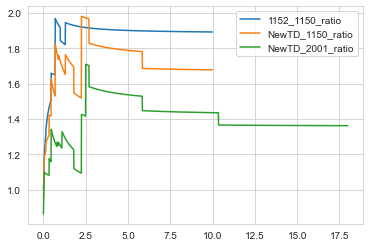

In [13]:
price_card_detail[['1152_1150_ratio','NewTD_1150_ratio','NewTD_2001_ratio']].plot()

In [14]:
price_card_detail[price_card_detail['NewTD'].isna()]

,1150,1152,2001,NewTD,1152_1150_ratio,NewTD_1150_ratio,NewTD_2001_ratio
18.00,NaN,2401.00,1466.00,NaN,NaN,NaN,NaN
18.01,NaN,2402.32,1466.81,NaN,NaN,NaN,NaN
18.02,NaN,2403.64,1467.62,NaN,NaN,NaN,NaN
18.03,NaN,2404.96,1468.43,NaN,NaN,NaN,NaN
18.04,NaN,2406.28,1469.24,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
29.96,NaN,3979.72,2434.76,NaN,NaN,NaN,NaN
29.97,NaN,3981.04,2435.57,NaN,NaN,NaN,NaN
29.98,NaN,3982.36,2436.38,NaN,NaN,NaN,NaN
29.99,NaN,3983.68,2437.19,NaN,NaN,NaN,NaN


# Volumetric card
data source:https://docs.google.com/spreadsheets/d/1LARnTsAEwboH3N-xSIg95jhVz-KZ2QLq4YCARYV1fHQ/edit#gid=1060545710&range=A1

In [15]:
volumetric_text = """
1.6	0.0520	5.5	|
1.6	0.0127	9	|
1.7	0.0679	5.5	|
1.7	0.0181	9	|
1.8	0.0944	5.5	|
1.8	0.0272	9	|
1.9	0.1162	5.5	|
1.9	0.0349	9	|
2	0.1485	5.5	|
2	0.0441	9	|
2.1	0.1896	5.5	|
2.1	0.0592	9	|
2.2	0.2151	5.5	|
2.2	0.0633	9	|
2.3	0.2534	5.5	|
2.3	0.0872	9	|
2.4	0.2841	5.5	|
2.4	0.1062	9	|
2.5	0.3224	5.5	|
2.5	0.1185	9	|
2.6	0.3484	5.5	|
2.6	0.1441	9	|
2.7	0.3743	5.5	|
2.7	0.1774	9	|
2.8	0.4126	5.5	|
2.8	0.2085	9	|
2.9	0.4233	5.5	|
2.9	0.2273	9	|
3	0.4449	5.5	|
3	0.2430	9	|
3.1	0.4692	5.5	|
3.1	0.2595	9	|
3.2	0.4584	5.5	|
3.2	0.2964	9	|
3.3	0.4594	5.5	|
3.3	0.3384	9	|
3.4	0.4753	5.5	|
3.4	0.3519	9	|
3.5	0.4638	5.5	|
3.5	0.3989	9	|
3.6	0.4457	5.5	|
3.6	0.4199	9	|
3.7	0.4452	5.5	|
3.7	0.4533	9	|
3.8	0.4337	5.5	|
3.8	0.4760	9	|
3.9	0.4246	5.5	|
3.9	0.4904	9	|
4	0.4129	5.5	|
4	0.5171	9	|
4.1	0.3893	5.5	|
4.1	0.5544	9	|
4.2	0.3707	5.5	|
4.2	0.5782	9	|
4.3	0.3194	5.5	|
4.3	0.6336	9	|
4.4	0.3228	5.5	|
4.4	0.6338	9	|
4.5	0.2647	5.5	|
4.5	0.6946	9	|
4.6	0.2528	5.5	|
4.6	0.7209	9	|
4.7	0.2033	5.5	|
4.7	0.7716	9	|
4.8	0.2144	5.5	|
4.8	0.7559	9	|
4.9	0.2116	5.5	|
4.9	0.7570	9	|
5	0.1606	5.5	|
5	0.7958	9	|
5.1	0.1640	5.5	|
5.1	0.8142	9	|
5.2	0.1680	5.5	|
5.2	0.8105	9	|
5.3	0.1244	5.5	|
5.3	0.8502	9	|
5.4	0.1068	5.5	|
5.4	0.8594	9	|
5.5	0.1306	5.5	|
5.5	0.8480	9	|
5.6	0.0919	5.5	|
5.6	0.8830	9	|
5.7	0.0808	5.5	|
5.7	0.9102	9	|
5.8	0.0993	5.5	|
5.8	0.8801	9	|
5.9	0.0635	5.5	|
5.9	0.9030	9	|
6	0.0985	5.5	|
6	0.8826	9	|
6.1	0.0435	5.5	|
6.1	0.9130	9	|
6.2	0.0413	5.5	|
6.2	0.9220	9	|
6.3	0.0594	5.5	|
6.3	0.9158	9	|
6.4	0.0385	5.5	|
6.4	0.9341	9	|
6.5	0.0503	5.5	|
6.5	0.9245	9	|
6.6	0.0305	5.5	|
6.6	0.9268	9	|
6.7	0.0484	5.5	|
6.7	0.9194	9	|
6.8	0.0420	5.5	|
6.8	0.9244	9	|
6.9	0.0407	5.5	|
6.9	0.9187	9	|
7	0.0083	5.5	|
7	0.9500	9	|
7.1	0.0196	5.5	|
7.1	0.9706	9	|
7.2	0.0139	5.5	|
7.2	0.9306	9	|
7.3	0.0482	5.5	|
7.3	0.8795	9	|
7.4	0.9747	9	|
7.5	0.9434	9	|
7.6	0.0469	5.5	|
7.6	0.9063	9	|
7.7	0.0217	5.5	|
7.7	0.9130	9	|
7.8	0.0238	5.5	|
7.8	0.9762	9	|
7.9	0.0217	5.5	|
7.9	0.8913	9	|
8	0.0444	5.5	|
8	0.9111	9	|
8.1	0.0645	5.5	|
8.1	0.9032	9	|
8.2	0.0690	5.5	|
8.2	0.8276	9	|
8.3	0.0870	5.5	|
8.3	0.9130	9	|
8.4	0.0556	5.5	|
8.4	0.8056	9	|
8.5	0.9000	9	|
8.6	1.0000	9	|
8.7	0.8235	9	|
8.8	0.9091	9	|
8.9	0.8750	9	|
9	0.9167	9	|
9.1	0.8750	9	|
9.2	0.9000	9	|
9.3	0.7143	9	|
9.4	1.0000	9	|
9.5	0.0714	5.5	|
9.5	0.9286	9	|
9.6	0.6000	9	|
9.7	0.8000	9	|
9.9	0.8000	9	|
10	0.1250	5.5	|
10	0.8750	9	|
10.1	1.0000	9	|
10.2	1.0000	9	|
10.3	1.0000	9	|
10.4	0.3333	5.5	|
10.5	0.2500	5.5	|
10.5	0.7500	9	|
10.6	0.6667	9	|
10.7	0.5000	9	|
10.8	1.0000	9	|
10.9	0.5000	9	|
11.1	0.5000	9	|
11.2	0.5000	9	|
11.3	0.5000	5.5	|
11.3	0.5000	9	|
11.4	1.0000	9	|
11.5	1.0000	9	|
11.6	1.0000	9	|
11.7	1.0000	9	|
11.8	0.5000	9	|
12	1.0000	9	|
12.1	1.0000	9	|
12.5	1.0000	9	|
12.8	0.5000	5.5	|
12.9	1.0000	9	|
13.1	1.0000	9	|
13.4	1.0000	5.5	|
13.8	0.5000	9	|
14.2	1.0000	9	|
14.6	1.0000	9	|
15.7	1.0000	9	|
17.6	1.0000	9	|
19.3	1.0000	9	|
20.4	1.0000	9	
"""

In [16]:
a = pd.DataFrame(volumetric_text.split('|')).applymap(lambda x: x.split())
a['actual_weight'] = a[0].apply(lambda x: x[0]).astype(float)
a['prob_of_pack'] = a[0].apply(lambda x: x[1]).astype(float)
a['volumetric_weight_kg'] = a[0].apply(lambda x: x[2]).astype(float)

In [17]:
a

,0,actual_weight,prob_of_pack,volumetric_weight_kg
0,"[1.6, 0.0520, 5.5]",1.6,0.0520,5.5
1,"[1.6, 0.0127, 9]",1.6,0.0127,9.0
2,"[1.7, 0.0679, 5.5]",1.7,0.0679,5.5
3,"[1.7, 0.0181, 9]",1.7,0.0181,9.0
4,"[1.8, 0.0944, 5.5]",1.8,0.0944,5.5
...,...,...,...,...
181,"[14.6, 1.0000, 9]",14.6,1.0000,9.0
182,"[15.7, 1.0000, 9]",15.7,1.0000,9.0
183,"[17.6, 1.0000, 9]",17.6,1.0000,9.0
184,"[19.3, 1.0000, 9]",19.3,1.0000,9.0


In [18]:
volumetric_card = a.groupby(['actual_weight'])[['volumetric_weight_kg', 'prob_of_pack']].apply(\
        lambda x: x.set_index('volumetric_weight_kg').to_dict(orient='index')).to_dict()
volumetric_card

{1.6: {5.5: {'prob_of_pack': 0.052}, 9.0: {'prob_of_pack': 0.0127}},
 1.7: {5.5: {'prob_of_pack': 0.0679}, 9.0: {'prob_of_pack': 0.0181}},
 1.8: {5.5: {'prob_of_pack': 0.0944}, 9.0: {'prob_of_pack': 0.0272}},
 1.9: {5.5: {'prob_of_pack': 0.1162}, 9.0: {'prob_of_pack': 0.0349}},
 2.0: {5.5: {'prob_of_pack': 0.1485}, 9.0: {'prob_of_pack': 0.0441}},
 2.1: {5.5: {'prob_of_pack': 0.1896}, 9.0: {'prob_of_pack': 0.0592}},
 2.2: {5.5: {'prob_of_pack': 0.2151}, 9.0: {'prob_of_pack': 0.0633}},
 2.3: {5.5: {'prob_of_pack': 0.2534}, 9.0: {'prob_of_pack': 0.0872}},
 2.4: {5.5: {'prob_of_pack': 0.2841}, 9.0: {'prob_of_pack': 0.1062}},
 2.5: {5.5: {'prob_of_pack': 0.3224}, 9.0: {'prob_of_pack': 0.1185}},
 2.6: {5.5: {'prob_of_pack': 0.3484}, 9.0: {'prob_of_pack': 0.1441}},
 2.7: {5.5: {'prob_of_pack': 0.3743}, 9.0: {'prob_of_pack': 0.1774}},
 2.8: {5.5: {'prob_of_pack': 0.4126}, 9.0: {'prob_of_pack': 0.2085}},
 2.9: {5.5: {'prob_of_pack': 0.4233}, 9.0: {'prob_of_pack': 0.2273}},
 3.0: {5.5: {'prob_of

In [19]:
#volumetric_card[30.1] = {5.5: {'prob_of_pack': 0}, 9.0: {'prob_of_pack': 1}}
# fill in the gap in weights
for i in np.arange(1.6, 30.1, 0.1):
    w = round(i, 1)
    if w in volumetric_card:
        if 5.5 not in volumetric_card[w]:
            volumetric_card[w][5.5] = {'prob_of_pack': 1 - volumetric_card[w][9.0]['prob_of_pack']}
        
        if 9.0 not in volumetric_card[w]:
            volumetric_card[w][9.0] = {'prob_of_pack': 1 - volumetric_card[w][5.5]['prob_of_pack']}
    else:
        volumetric_card[w] = volumetric_card[round(w-0.1,1)]
                

In [20]:
volumetric_card

{1.6: {5.5: {'prob_of_pack': 0.052}, 9.0: {'prob_of_pack': 0.0127}},
 1.7: {5.5: {'prob_of_pack': 0.0679}, 9.0: {'prob_of_pack': 0.0181}},
 1.8: {5.5: {'prob_of_pack': 0.0944}, 9.0: {'prob_of_pack': 0.0272}},
 1.9: {5.5: {'prob_of_pack': 0.1162}, 9.0: {'prob_of_pack': 0.0349}},
 2.0: {5.5: {'prob_of_pack': 0.1485}, 9.0: {'prob_of_pack': 0.0441}},
 2.1: {5.5: {'prob_of_pack': 0.1896}, 9.0: {'prob_of_pack': 0.0592}},
 2.2: {5.5: {'prob_of_pack': 0.2151}, 9.0: {'prob_of_pack': 0.0633}},
 2.3: {5.5: {'prob_of_pack': 0.2534}, 9.0: {'prob_of_pack': 0.0872}},
 2.4: {5.5: {'prob_of_pack': 0.2841}, 9.0: {'prob_of_pack': 0.1062}},
 2.5: {5.5: {'prob_of_pack': 0.3224}, 9.0: {'prob_of_pack': 0.1185}},
 2.6: {5.5: {'prob_of_pack': 0.3484}, 9.0: {'prob_of_pack': 0.1441}},
 2.7: {5.5: {'prob_of_pack': 0.3743}, 9.0: {'prob_of_pack': 0.1774}},
 2.8: {5.5: {'prob_of_pack': 0.4126}, 9.0: {'prob_of_pack': 0.2085}},
 2.9: {5.5: {'prob_of_pack': 0.4233}, 9.0: {'prob_of_pack': 0.2273}},
 3.0: {5.5: {'prob_of

In [21]:
df['weight'].describe()

count    416467.000000
mean          1.861149
std           2.943147
min           0.002269
25%           0.363000
50%           1.044000
75%           1.984075
max          29.995032
Name: weight, dtype: float64

# Both channels, on a subset of stores 

In [22]:
data = df[(df['epc_combined_date']>='2021-04-01')].copy(deep=True)
data['epc_combined_month'] = data['epc_combined_date'].apply(lambda x: x[:7])
data.head()

,store_id,epc_combined_date,order_channel_post,fm_count,lm_count,gmv,weight,num_mids,sales_fm,purchase_fm,purchase_logistics_fee_lm_previous,purchase_other_fees_lm_previous,logistics_profit_cny_previous,purchase_logistics_fee_lm_1152,purchase_logistics_fee_lm_newtd,epc_combined_month
1,5f8e200288b1e12975146eb2,2021-07-16,2001,29,1,151.840001,1.406,33,352.27,34.05,146.79,0.0,171.43,144.510002,151.698002,2021-07
2,5d83b30b8c8dc7517df7afff,2021-05-28,1150,31,1,161.270000,1.525,34,383.52,36.95,115.23,0.0,231.34,154.624998,161.574998,2021-05
3,5f1fbc143b6482c24274aa6b,2021-06-22,1150,27,5,398.140003,5.673,27,862.02,48.81,453.84,0.0,359.37,507.205003,403.745002,2021-06
5,5eee6df0ca9b329a492832df,2021-05-30,2001,17,1,92.000000,1.456,17,299.64,21.03,144.41,0.0,134.20,148.759997,155.847998,2021-05
7,60135849c7f68c006910a31f,2021-06-27,2001,92,3,381.460002,4.586,97,1250.80,102.77,453.51,0.0,694.52,414.809997,333.089998,2021-06


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416467 entries, 0 to 417463
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   store_id                            416467 non-null  object 
 1   epc_combined_date                   416467 non-null  object 
 2   order_channel_post                  416467 non-null  int64  
 3   fm_count                            416467 non-null  int64  
 4   lm_count                            416467 non-null  int64  
 5   gmv                                 416467 non-null  float64
 6   weight                              416467 non-null  float64
 7   num_mids                            416467 non-null  int64  
 8   sales_fm                            416467 non-null  float64
 9   purchase_fm                         416467 non-null  float64
 10  purchase_logistics_fee_lm_previous  416467 non-null  float64
 11  purchase_other_fees_lm_pre

## good stores: monthly recombined packages (days) >= 3 and average weight > 1kg

In [24]:
temp = data.groupby(['store_id', 'epc_combined_month']).agg({
            'epc_combined_date': 'count',\
            'weight': 'mean'
        }).reset_index().groupby('store_id').mean()

good_stores = set(temp[(temp['epc_combined_date']>=3) & (temp['weight']>=0)].index)

len(good_stores)

4723

## Estimate the change of logistcs profit margin when the order volume changes
0. The list of good stores include all the stores (no cherry-picking) 
1. With NewTD, calculate the logistics price of NewTD using the price card, (not the ratio), and calculate the logistics profit margin; if not in good store, calculate the price as 1.2 * old channel price, using the price card, not the previous actual price. 
2. Increase order volume, revenue, sales_fm, and weight by X%, calculate the logistics price of NewTD using the price card, and calculate the logistics profit margin; same way to calculalte if not in good stores. Here we assume the order volume, GMV, sales_fm, and purchase_fm, and weight will increase by the same percentage. 
3. calculate diff between 2 and 1

In [26]:
for new_channel in ['1152', 'NewTD']:
    for up_ratio in [1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5]:
        data[f'purchase_logistics_fee_lm_{new_channel}_{up_ratio}'] = data.apply(lambda x: \
           calculate_price_by_weight_by_package(x, up_ratio=up_ratio, new_channel=new_channel,\
           good_stores=good_stores, price_card_detail=price_card_detail, \
           volumetric_card=volumetric_card, q4_increase=1.2), axis=1)

In [27]:
for up_ratio in [1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5]:
    data[f'sales_fm_{up_ratio}'] = data.apply(lambda x: \
                    x['sales_fm'] * up_ratio if x['store_id'] in good_stores else x['sales_fm'], axis=1)
    data[f'purchase_fm_{up_ratio}'] = data.apply(lambda x: \
                    x['purchase_fm'] * up_ratio if x['store_id'] in good_stores else x['purchase_fm'], axis=1)
    data[f'purchase_other_fees_lm_previous_{up_ratio}'] = data.apply(lambda x: \
                    x['purchase_other_fees_lm_previous'] * up_ratio if x['store_id'] in good_stores else x['purchase_other_fees_lm_previous'], axis=1)

In [28]:
data['purchase_logistics_fee_lm_previous_theoretical'] = data.apply(\
            lambda x: calculate_price_by_weight_by_package(x, up_ratio=1.0 , new_channel=None,\
                    good_stores=[], price_card_detail=price_card_detail, \
                    volumetric_card=volumetric_card, q4_increase=1.0), axis=1)

In [29]:
volumetric_card[5.7]

{5.5: {'prob_of_pack': 0.0808}, 9.0: {'prob_of_pack': 0.9102}}

In [30]:
price_card_detail.loc[[5.5, 5.67, 9.0]]

,1150,1152,2001,NewTD,1152_1150_ratio,NewTD_1150_ratio,NewTD_2001_ratio
5.50,389.50,740.0,453.50,695.0,1.899872,1.784339,1.532525
5.67,401.23,762.1,467.27,715.4,1.899409,1.783017,1.531021
9.00,631.00,1195.0,737.00,1060.0,1.893819,1.679873,1.438263


In [31]:
# count how many packages are upgraded
data['is_good_store_id'] = data.apply(\
                lambda x: 1 if x['store_id'] in good_stores else 0, \
                axis=1)

data['fm_count_upgraded'] = data.apply(\
                lambda x: x['fm_count'] if x['store_id'] in good_stores else 0, \
                axis=1)

data['lm_count_upgraded'] = data.apply(\
                lambda x: x['lm_count'] if x['store_id'] in good_stores else 0, \
                axis=1)

data['num_mids_upgraded'] = data.apply(\
                lambda x: x['num_mids'] if x['store_id'] in good_stores else 0, \
                axis=1)

data['gmv_upgraded'] = data.apply(\
                lambda x: x['gmv'] if x['store_id'] in good_stores else 0, \
                axis=1)

data['weight_upgraded'] = data.apply(\
                lambda x: x['weight'] if x['store_id'] in good_stores else 0, \
                axis=1)

In [32]:
agg_columns = {
    'store_id': ['count', 'nunique'],\
    'fm_count': 'sum',\
    'lm_count': 'sum',\
    'num_mids': 'sum',\
    'gmv': 'sum',\
    'weight': 'sum',\
    
    'is_good_store_id': 'nunique',\
    'fm_count_upgraded': 'sum',\
    'lm_count_upgraded': 'sum',\
    'num_mids_upgraded': 'sum',\
    'gmv_upgraded': 'sum',\
    'weight_upgraded': 'sum',\
    
    'sales_fm': 'sum',\
    'purchase_fm': 'sum',\
    'purchase_logistics_fee_lm_previous': 'sum',\
    'purchase_other_fees_lm_previous': 'sum',\
    'logistics_profit_cny_previous': 'sum',\
    'purchase_logistics_fee_lm_previous_theoretical': 'sum'
}

b = {}

for up_ratio in [1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5]:
    b[f'sales_fm_{up_ratio}'] = 'sum'
    b[f'purchase_fm_{up_ratio}'] = 'sum'
    b[f'purchase_other_fees_lm_previous_{up_ratio}'] = 'sum'
    for new_channel in ['1152', 'NewTD']:
        b[f'purchase_logistics_fee_lm_{new_channel}_{up_ratio}'] = 'sum'
agg_columns.update(b)
# agg_columns

In [34]:
monthly = data.groupby(['epc_combined_month', 'order_channel_post']).agg(agg_columns)


monthly['logistics_profit_margin_previous'] = monthly['logistics_profit_cny_previous'] / monthly['sales_fm']

for new_channel in ['1152', 'NewTD']:
    for up_ratio in [1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5]:
        monthly[f'logistics_profit_margin_{new_channel}_{up_ratio}'\
                   ] = (monthly[f'sales_fm_{up_ratio}'] - \
                        monthly[f'purchase_fm_{up_ratio}'] - \
                        monthly[f'purchase_logistics_fee_lm_{new_channel}_{up_ratio}'] - \
                        monthly[f'purchase_other_fees_lm_previous_{up_ratio}']\
                       ) / (up_ratio * monthly[f'sales_fm_{up_ratio}'])


monthly['logistics_profit_margin_previous_theoretical'] = (monthly['sales_fm'] - \
                                                           monthly['purchase_fm'] - \
                                                           monthly['purchase_logistics_fee_lm_previous_theoretical']-\
                                                           monthly['purchase_other_fees_lm_previous']
                                                          ) / monthly['sales_fm']

monthly['logistics_profit_margin_previous_theoretical_1.2'] = (monthly['sales_fm'] - \
                                                           monthly['purchase_fm'] - \
                                                          1.2* monthly['purchase_logistics_fee_lm_previous_theoretical']-\
                                                           monthly['purchase_other_fees_lm_previous']
                                                          ) / monthly['sales_fm']
        
monthly = monthly.reset_index()

for up_ratio in [1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5]:
    monthly[f'logistics_profit_margin_1152_{up_ratio}'] = monthly.apply(\
                                    lambda x: np.nan if x[('order_channel_post', '')]!=1150 \
                                                     else x[f'logistics_profit_margin_1152_{up_ratio}'],\
                                    axis=1)



monthly[('is_good_store_id', 'nunique')] = monthly[('is_good_store_id', 'nunique')] / monthly[('store_id', 'nunique')]
monthly[('fm_count_upgraded', 'sum')] = monthly[('fm_count_upgraded', 'sum')] / monthly[('fm_count', 'sum')]
monthly[('lm_count_upgraded', 'sum')]  = monthly[('lm_count_upgraded', 'sum')] / monthly[('lm_count', 'sum')]
monthly[('num_mids_upgraded', 'sum')] = monthly[('num_mids_upgraded', 'sum')] / monthly[('num_mids', 'sum')]
monthly[('gmv_upgraded', 'sum')] = monthly[('gmv_upgraded', 'sum')] / monthly[('gmv', 'sum')]
monthly[('weight_upgraded', 'sum')] = monthly[('weight_upgraded', 'sum')] / monthly[('weight', 'sum')]

In [35]:
monthly.sort_values(['order_channel_post', 'epc_combined_month'])

epc_combined_month order_channel_post store_id         fm_count lm_count  \
                                           count nunique      sum      sum   
0            2021-04               1150    35933    3769   319247    51363   
2            2021-05               1150    35554    3742   344210    50922   
4            2021-06               1150    35404    3956   340735    50121   
6            2021-07               1150    34241    3961   315885    46194   
1            2021-04               2001    25933    3476   420239    36312   
3            2021-05               2001    27696    3471   483934    39178   
5            2021-06               2001    24849    3604   404395    33524   
7            2021-07               2001    24276    3607   398479    31335   

  num_mids           gmv        weight is_good_store_id  ...  \
       sum           sum           sum          nunique  ...   
0   362698  3.168884e+06  39121.145640         0.000531  ...   
2   389280  3.274729e+06  41049.140329         0.000534  ...   
4   384325  3.192345e+06  39753.388549         0.000506  ...   
6   356703  2.755068e+06  34061.011887         0.000505  ...   
1   462506  3.520177e+06  37455.708276         0.000575  ...   
3   529570  3.769565e+06  41701.392485         0.000576  ...   
5   442153  3.201102e+06  35068.025848         0.000555  ...   
7   435023  2.829502e+06  31130.926944         0.000554  ...   

  logistics_profit_margin_1152_1.5 logistics_profit_margin_NewTD_1.0  \
                                                                       
0                        -0.132613                         -0.091601   
2                        -0.123467                         -0.075953   
4                        -0.120473                         -0.068563   
6                        -0.110443                         -0.052593   
1                              NaN                          0.065280   
3                              NaN                          0.080977   
5                              NaN                          0.083184   
7                              NaN                          0.116625   

  logistics_profit_margin_NewTD_1.05 logistics_profit_margin_NewTD_1.1  \
                                                                         
0                          -0.089195                         -0.086304   
2                          -0.075038                         -0.072787   
4                          -0.068075                         -0.066805   
6                          -0.053003                         -0.052640   
1                           0.056982                          0.051397   
3                           0.071417                          0.064990   
5                           0.072599                          0.065045   
7                           0.104431                          0.095031   

  logistics_profit_margin_NewTD_1.15 logistics_profit_margin_NewTD_1.2  \
                                                                         
0                          -0.082432                         -0.079031   
2                          -0.070053                         -0.066985   
4                          -0.064092                         -0.061537   
6                          -0.051429                         -0.050367   
1                           0.047670                          0.044155   
3                           0.060652                          0.056641   
5                           0.059871                          0.054991   
7                           0.087605                          0.080908   

  logistics_profit_margin_NewTD_1.3 logistics_profit_margin_NewTD_1.5  \
                                                                        
0                         -0.072314                         -0.061306   
2                         -0.061325                         -0.052945   
4                         -0.057297                         -0.050776   
6           

In [50]:
monthly.sort_values(['order_channel_post', 'epc_combined_month'])[[\
                                   'order_channel_post',\
                                   'epc_combined_month',\
                                   'logistics_profit_margin_previous',\
                                   'logistics_profit_margin_previous_theoretical',\
                                    # price increase by 20%, order volume not change
                                   'logistics_profit_margin_previous_theoretical_1.2',\
                                    # price increase by 20% for old channel, and new price card for the new channel,  order volume up by 10%
                                   'logistics_profit_margin_1152_1.0',\
                                   'logistics_profit_margin_1152_1.1',\
                                   'logistics_profit_margin_1152_1.2',\
                                   'logistics_profit_margin_NewTD_1.0',\
                                   'logistics_profit_margin_NewTD_1.1',\
                                   'logistics_profit_margin_NewTD_1.2',\
                                  ]]



,order_channel_post,epc_combined_month,logistics_profit_margin_previous,logistics_profit_margin_previous_theoretical,logistics_profit_margin_previous_theoretical_1.2,logistics_profit_margin_1152_1.0,logistics_profit_margin_1152_1.1,logistics_profit_margin_1152_1.2,logistics_profit_margin_NewTD_1.0,logistics_profit_margin_NewTD_1.1,logistics_profit_margin_NewTD_1.2
,,,,,,,,,,,
0,1150,2021-04,0.414810,0.318850,0.195022,-0.192630,-0.180790,-0.167945,-0.091601,-0.086304,-0.079031
2,1150,2021-05,0.431781,0.331013,0.209484,-0.176053,-0.166662,-0.155591,-0.075953,-0.072787,-0.066985
4,1150,2021-06,0.427496,0.332735,0.212337,-0.167496,-0.159533,-0.149350,-0.068563,-0.066805,-0.061537
6,1150,2021-07,0.423575,0.333948,0.215701,-0.147490,-0.141294,-0.133850,-0.052593,-0.052640,-0.050367
1,2001,2021-04,0.403918,0.295883,0.170191,NaN,NaN,NaN,0.065280,0.051397,0.044155
3,2001,2021-05,0.419671,0.310180,0.186745,NaN,NaN,NaN,0.080977,0.064990,0.056641
5,2001,2021-06,0.411090,0.306654,0.183298,NaN,NaN,NaN,0.083184,0.065045,0.054991
7,2001,2021-07,0.393780,0.323847,0.205144,NaN,NaN,NaN,0.116625,0.095031,0.080908


# conclusion
1. suppose upgrading all the orders (not selective stores) to NewTD, the profit margin of the old channel 1005 will drop from 21% (logistics_profit_margin_previous_theoretical_1.2, the theoretical profit margin using the old channel, supposing the price of the old channel increases by 20% in Q4) to -5.2% (logistics_profit_margin_NewTD_1.0, supposing order volume remain the same and price of the old channel increases by 20%). If the order volume increases by 20%, the profit margin will becomes -5.0% (logistics_profit_margin_NewTD_1.2).

2. suppose upgrading all the orders (not selective stores) to NewTD, the profit margin of the old channel 2001 will drop from 20% to 12%. If the order volume increases by 20%, the profit margin will becomes 8%. That is because with order volume increasing, the unit cost of heavier packages not necessarily decreases. 

In [45]:
(monthly[f'sales_fm_1.0'] - \
monthly[f'purchase_fm_1.0'] - \
monthly[f'purchase_logistics_fee_lm_NewTD_1.0'] - \
monthly[f'purchase_other_fees_lm_previous_1.0']\
) / (up_ratio * monthly[f'sales_fm_1.0'])

,sum
0,-0.061067
1,0.043520
2,-0.050635
3,0.053985
4,-0.045709
5,0.055456
6,-0.035062
7,0.077750


In [37]:
data[data['is_good_store_id']!=0][['order_channel_post', 'store_id', 'is_good_store_id', \
      'weight', 'sales_fm', 'sales_fm_1.2', 'purchase_fm', 'purchase_fm_1.2',\
      'purchase_logistics_fee_lm_previous_theoretical', 'purchase_logistics_fee_lm_previous',\
      'purchase_logistics_fee_lm_NewTD_1.0', 'purchase_logistics_fee_lm_NewTD_1.2'
     ]].head(20)

,order_channel_post,store_id,is_good_store_id,weight,sales_fm,sales_fm_1.2,purchase_fm,purchase_fm_1.2,purchase_logistics_fee_lm_previous_theoretical,purchase_logistics_fee_lm_previous,purchase_logistics_fee_lm_NewTD_1.0,purchase_logistics_fee_lm_NewTD_1.2
1,2001,5f8e200288b1e12975146eb2,1,1.406,352.27,422.724,34.05,40.860,147.180000,146.79,187.23000,263.864480
2,1150,5d83b30b8c8dc7517df7afff,1,1.525,383.52,460.224,36.95,44.340,114.880000,115.23,198.56000,279.501312
3,1150,5f1fbc143b6482c24274aa6b,1,5.673,862.02,1034.424,48.81,58.572,609.418870,453.84,1027.40660,1036.207840
5,2001,5eee6df0ca9b329a492832df,1,1.456,299.64,359.568,21.03,25.236,152.080000,144.41,192.38000,269.513000
7,2001,60135849c7f68c006910a31f,1,4.586,1250.80,1500.960,102.77,123.324,655.936577,453.51,955.25654,1004.520000
8,1150,5f49c5adefef68f04fbc0b13,1,1.292,292.64,351.168,20.01,24.012,105.750000,105.90,174.87000,201.650000
12,2001,5e1ed86d4da39d151477e51a,1,6.912,1118.14,1341.768,66.95,80.340,718.588376,687.82,1035.38629,1028.245000
13,1150,6003201118d554943d213d6f,1,0.594,176.56,211.872,19.84,23.808,64.380000,64.71,100.77000,113.130000
15,2001,5cd9af182e0aac1d00fc60c3,1,1.083,221.19,265.428,12.81,15.372,123.840000,118.72,153.24000,175.900000
19,1150,5d3783a33bef630ca76e82ca,1,4.150,765.37,918.444,51.02,61.224,518.143255,321.73,888.23540,982.746360


In [38]:
(data[data['is_good_store_id']!=0]['purchase_logistics_fee_lm_1152_1.1'\
            ]/data[data['is_good_store_id']!=0]['purchase_logistics_fee_lm_NewTD_1.0']).mean()

1.1963785346521698

In [49]:
temp = data[(data['is_good_store_id']!=0) & (data['order_channel_post']==1150)]
(temp['purchase_logistics_fee_lm_NewTD_1.2'] / temp['purchase_logistics_fee_lm_NewTD_1.0']).mean()

1.178059014731079

In [48]:
temp = data[(data['is_good_store_id']!=0) & (data['order_channel_post']==2001)]
(temp['purchase_logistics_fee_lm_NewTD_1.2'] / temp['purchase_logistics_fee_lm_NewTD_1.0']).mean()

1.221876873992467